In [1]:
# Change Python path
import os, sys
os.chdir("/LOCALDATA/ARTHURs_FILES/Codigos/")
print(os.getcwd())
sys.path.append('python_modules')

# Enables modules autoreload (important during development)
%load_ext autoreload
%autoreload 2

/LOCALDATA/ARTHURs_FILES/Codigos


## SST trends

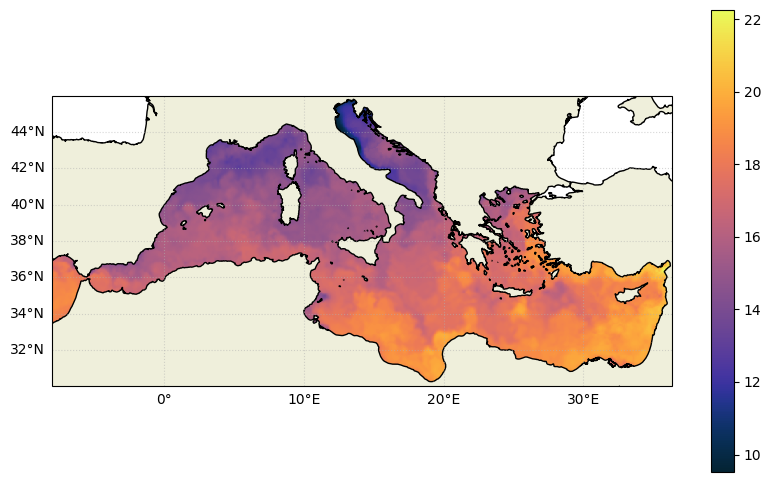

In [ ]:
from data_managers.load_save_cmems_sst import load_cmems_sst
from data_plotters.basic_plotting import plot_map
import cmocean.cm as cmo

ds_cmems_sst = load_cmems_sst([2010], [1], time_selector="2010-01-01")

plot_map(
    ds_cmems_sst.lon, ds_cmems_sst.lat,
    ds_cmems_sst.analysed_sst,
    extent="med",
    cmap=cmo.thermal
)

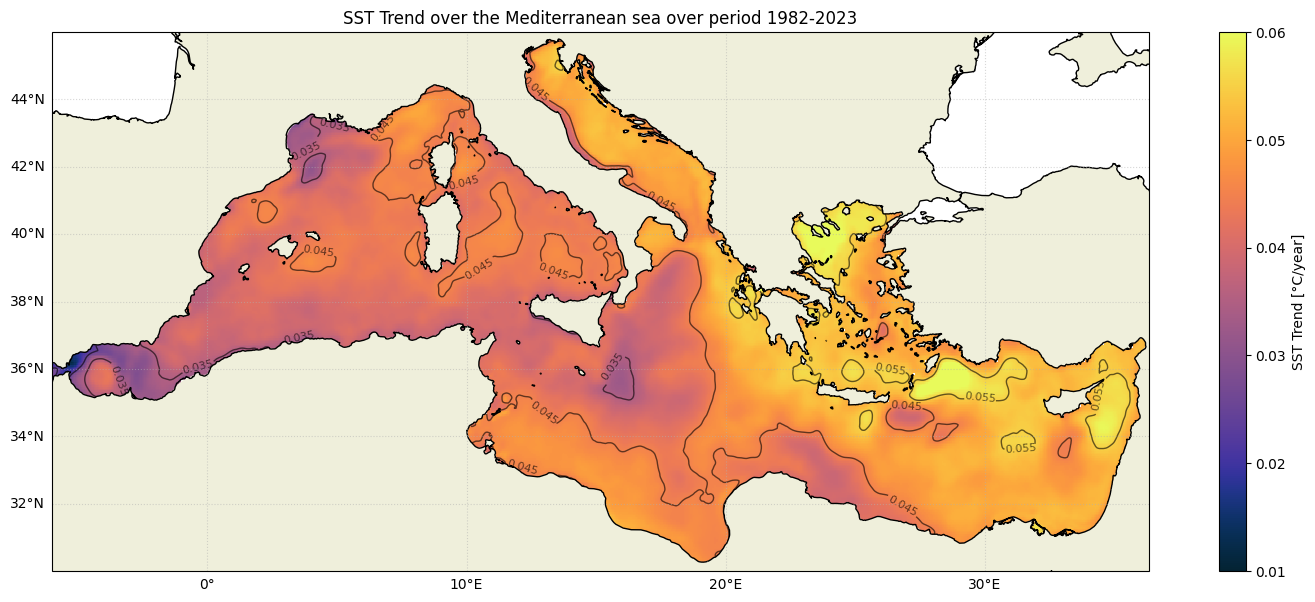

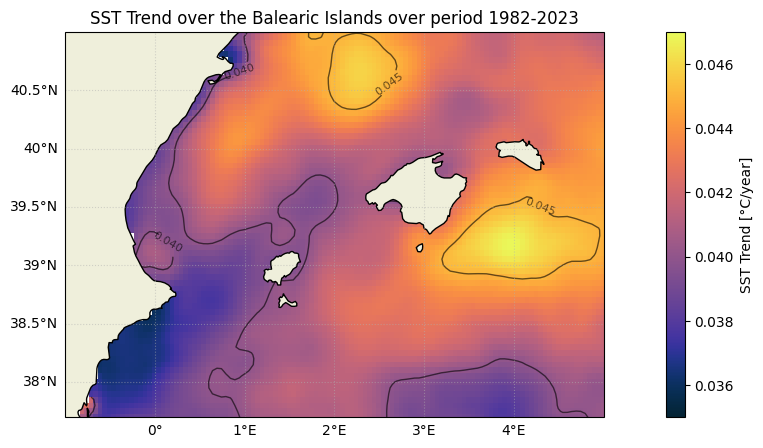

In [ ]:
from data_managers.load_save_cmems_sst import load_cmems_sst_trend
from data_plotters.basic_plotting import plot_map
import cmocean.cm as cmo

ds_trend = load_cmems_sst_trend()

plot_map(
    ds_trend.lon, ds_trend.lat,
    ds_trend.sst_trend,

    figsize = (18,7),

    # Med Sea
    title = "SST Trend over the Mediterranean sea over period 1982-2023",
    extent = "med",
    vmin = 0.01,
    vmax = 0.06,

    contours_levels = [0.025, 0.035, 0.045, 0.055],

    cbar_name = "SST Trend [°C/year]",
    cmap = cmo.thermal,
)

plot_map(
    ds_trend.lon, ds_trend.lat,
    ds_trend.sst_trend,

    figsize = (16,5),

    # Balears
    title = "SST Trend over the Balearic Islands over period 1982-2023",
    vmin = 0.035,
    vmax = 0.047,

    contours_levels = [0.04, 0.045],

    cbar_name = "SST Trend [°C/year]",
    cmap = cmo.thermal,
)

## Bathymetry

In [17]:
from data_managers.load_dataset import load_bathy
ds_bathy_GEBCO = load_bathy().sel(lon=slice(-1,5.5)).sel(lat=slice(37,41))
ds_bathy_GEBCO

<xarray.Dataset> Size: 18MB
Dimensions:  (lat: 960, lon: 1560)
Coordinates:
  * lat      (lat) float64 8kB 37.0 37.01 37.01 37.01 ... 40.99 40.99 40.99 41.0
  * lon      (lon) float64 12kB -0.9979 -0.9938 -0.9896 ... 5.49 5.494 5.498
Data variables:
    crs      (lat, lon) object 12MB b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    depth    (lat, lon) float32 6MB 2.554e+03 2.551e+03 ... 2.656e+03 2.655e+03
Attributes: (12/37)
    title:                           The GEBCO_2023 Grid - a continuous terra...
    summary:                         The GEBCO_2023 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    references:                      DOI: 10.5285/f98b053b-0cbc-6c23-e053-6c8...
    node_offset:                     1.0
    NCO:                             netCDF Operators version 5.0.6 (Homepage...

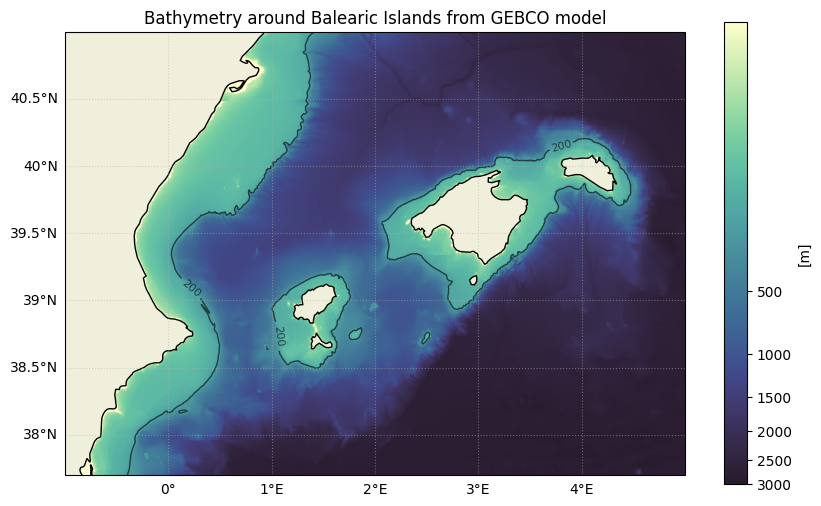

In [28]:
from utils.plot_utils import plot_map
import cmocean.cm as cmo
import matplotlib.colors as mcolors

plot_map(
    ds_bathy_GEBCO.lon, ds_bathy_GEBCO.lat,
    ds_bathy_GEBCO.depth,
    extent="balears",
    cmap=cmo.deep,
    cbar_inversed=True,
    title="Bathymetry around Balearic Islands from GEBCO model",
    cbar_name="[m]",
    norm=mcolors.PowerNorm(gamma=0.3, vmin=10, vmax=3000),
    contours_levels=[200],
)

In [11]:
ds_bathy_MFC = load_bathy(source="mfc").sel(lon=slice(-1,5.5)).sel(lat=slice(37,41))
ds_bathy_MFC

Loaded MFC bathymetry dataset.


<xarray.Dataset> Size: 51kB
Dimensions:  (lat: 80, lon: 156)
Coordinates:
  * lat      (lat) float32 320B 37.69 37.73 37.77 37.81 ... 40.9 40.94 40.98
  * lon      (lon) float32 624B -1.0 -0.9583 -0.9167 ... 5.375 5.417 5.458
Data variables:
    deptho   (lat, lon) float32 50kB ...
Attributes:
    Conventions:  CF-1.0
    history:      Tue Apr  8 10:17:39 2025: ncks -F -d longitude,120,276 -d l...
    NCO:          netCDF Operators version 5.0.6 (Homepage = http://nco.sf.ne...

Loaded MFC bathymetry dataset.


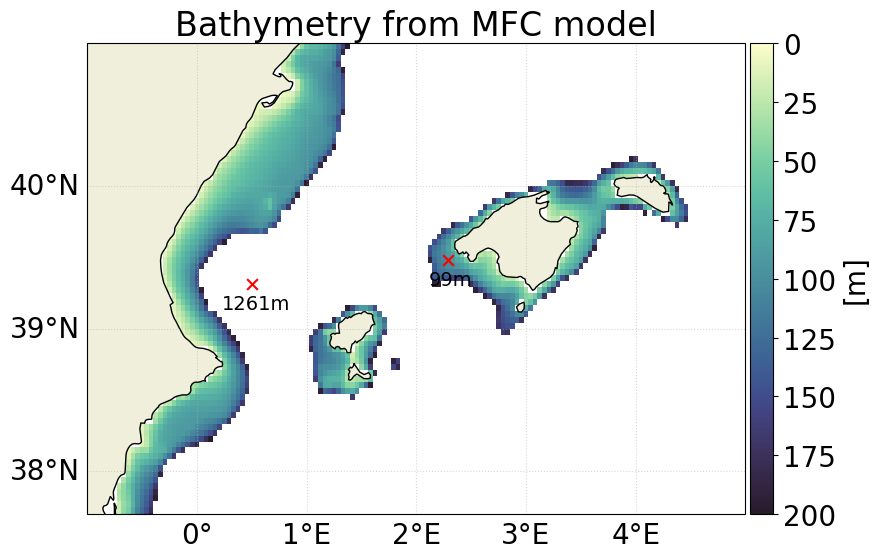

In [43]:
from data_managers.load_save_basics import load_bathy
from data_plotters.basic_plotting import plot_map
import cmocean.cm as cmo
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

ds_bathy_MFC = load_bathy(source="mfc").sel(lon=slice(-1,5.5)).sel(lat=slice(37,41))

ds_bathy_MFC = ds_bathy_MFC.where(ds_bathy_MFC.depth < 200)

plot_map(
    ds_bathy_MFC.lon, ds_bathy_MFC.lat,
    ds_bathy_MFC.depth,
    
    title="Bathymetry from MFC model",
    fontsize = 20,
    
    extent="balears",
    cmap=cmo.deep,
    cbar_inversed=True,
    cbar_unit="[m]",

    # vmin=None, vmax=None,
    # norm=mcolors.PowerNorm(gamma=0.3, vmin=10, vmax=3000),
    contours_levels=[200],
    yticks=4,

    # show_plots=True
)
with plt.rc_context({'font.size': 20}):
    for i, (lon, lat, d) in enumerate([[2.292, 39.48, 99], [0.50, 39.31, 1261]]):
        plt.scatter(lon, lat, marker="x", color="red", s=60)
        plt.annotate(f"{d}m", (lon, lat), xytext=(-20 if i==0 else -30, -25), textcoords="offset pixels", fontsize=14)

    plt.show()